In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from PyAstronomy import pyasl
from sklearn.metrics import mean_squared_error
from scipy.signal import savgol_filter
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib notebook

df0=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO2\Compiled_Data\dataset0_smoothed.csv', sep=',',  index_col=0)
df1=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO2\Compiled_Data\dataset1_smoothed.csv', sep=',',  index_col=0)
df2=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO2\Compiled_Data\dataset2_smoothed.csv', sep=',',  index_col=0)
df3=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO2\Compiled_Data\dataset3_smoothed.csv', sep=',',  index_col=0)

dataset_df = pd.concat([df0, df1, df2, df3])

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Import plotly package
import plotly
import plotly.graph_objs as go

# Check ploltly version
plotly.__version__

# To communicate with Plotly's server, sign in with credentials file
import chart_studio.plotly as py

In [3]:
from feature_selector import FeatureSelector


total_features_df = dataset_df.drop(['File_No', 'Cast_date', 'dayOfWeek', 'Die', 'cav1_defect','cav2_defect', 'defect_smoothed', 'Shot_no'], axis=1)

features_df = total_features_df.drop(['defect'], axis=1)
features_df = pd.get_dummies(features_df)
labels_df = dataset_df.loc[:, ['defect']]




"""
fs = FeatureSelector(data = features_df, labels = labels_df)

fs.identify_all(selection_params = {'missing_threshold': 0.5, 'correlation_threshold': 0.7, 
                                    'task': 'regression', 'eval_metric': 'l2', 
                                     'cumulative_importance': 0.9})
"""

"\nfs = FeatureSelector(data = features_df, labels = labels_df)\n\nfs.identify_all(selection_params = {'missing_threshold': 0.5, 'correlation_threshold': 0.7, \n                                    'task': 'regression', 'eval_metric': 'l2', \n                                     'cumulative_importance': 0.9})\n"

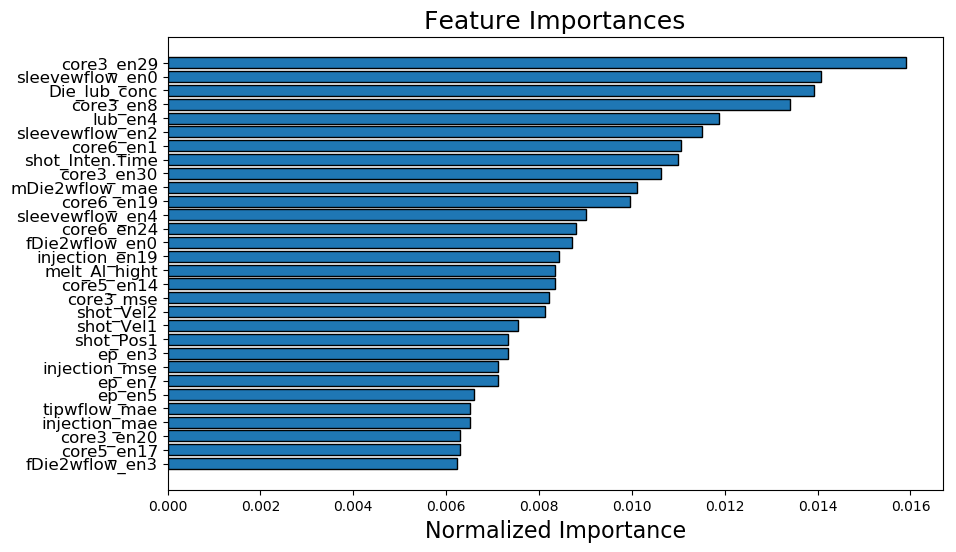

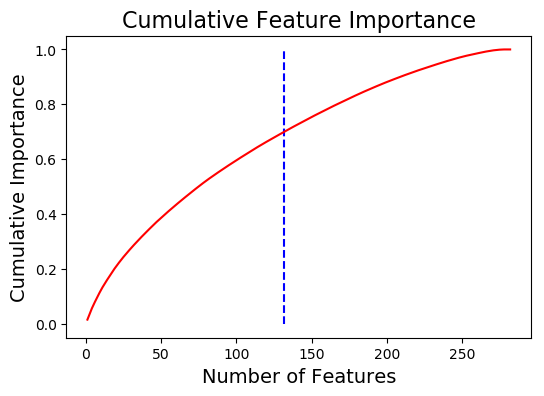

132 features required for 0.70 of cumulative importance


In [11]:
features_df.shape
fs.plot_feature_importances(plot_n = 30, threshold = 0.7)
#plt.savefig('Cumulative_Feature_Importance.png')

In [8]:
#fs.feature_importances['feature']
features_df.core3_en29.unique().shape

(107178,)

In [98]:
import seaborn as sns
slctd_featrs_df = features_df[np.asarray(fs.feature_importances['feature'])[0:149]]

fs2 = FeatureSelector(data = slctd_featrs_df, labels = labels_df)

fs2.identify_collinear(correlation_threshold = 0.7)


slctd_featrs2 = np.asarray(list(set(slctd_featrs_df)^set(fs2.ops['collinear'])))
slctd_featrs_df2 = features_df[slctd_featrs2]

78 features with a correlation magnitude greater than 0.70.



<IPython.core.display.Javascript object>


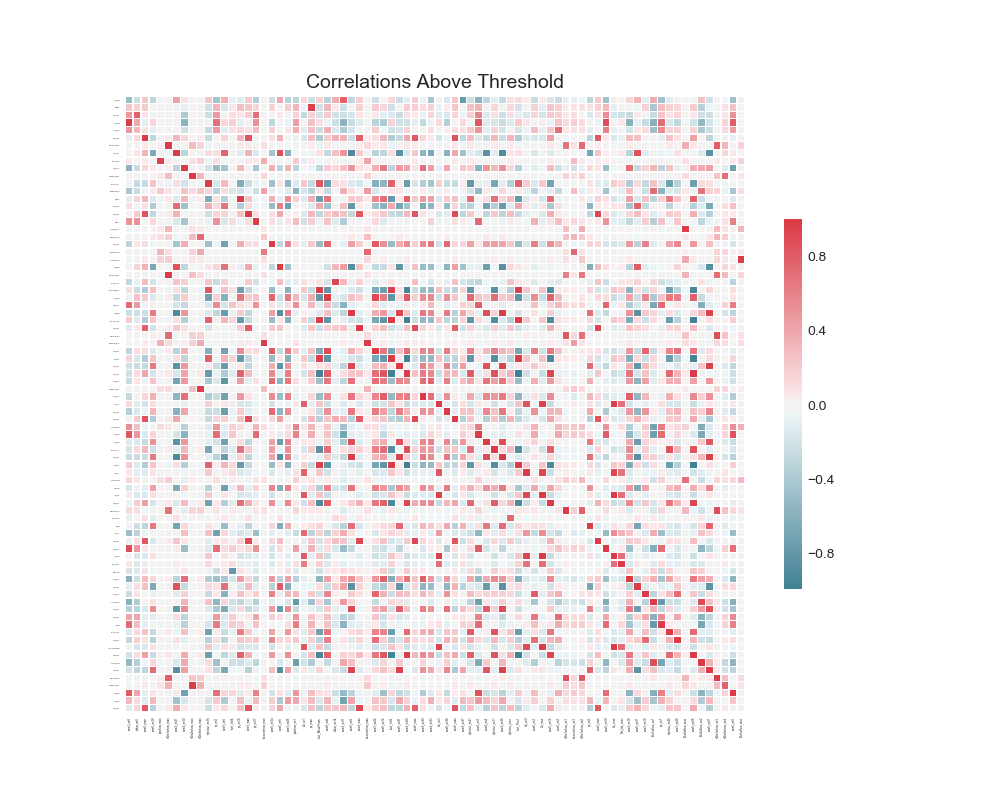

In [62]:
fs2.plot_collinear()
#plt.savefig('corr_0.7.pdf')

<IPython.core.display.Javascript object>


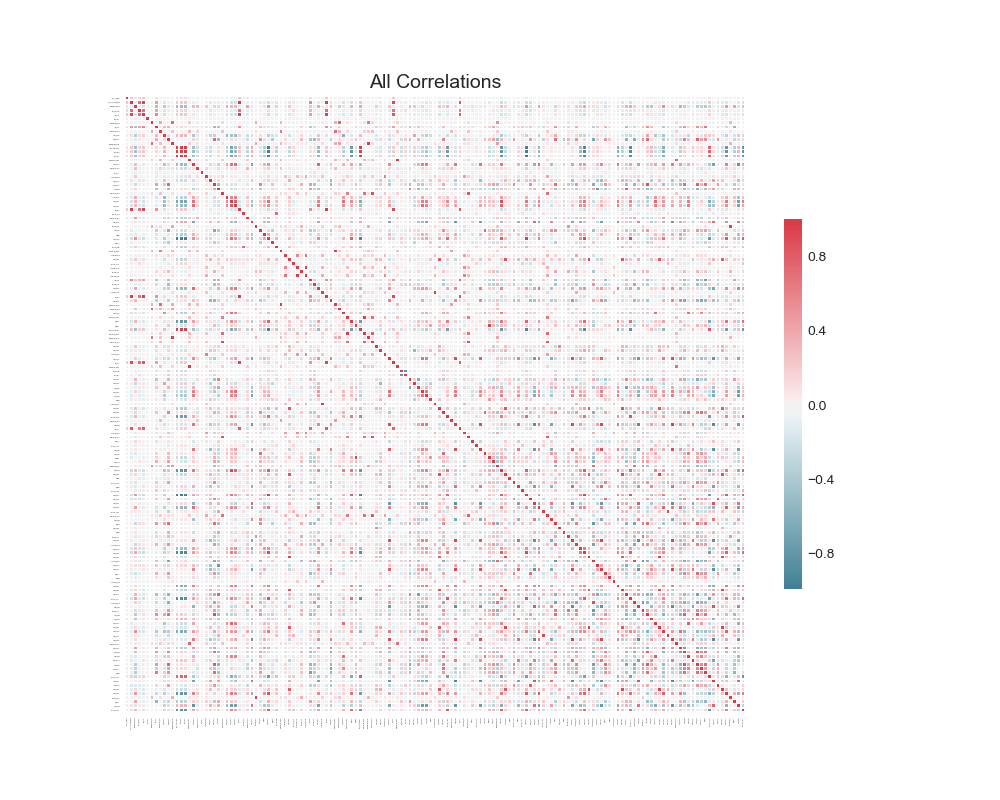

In [63]:
fs2.plot_collinear(plot_all = True)
#plt.savefig('corr_all.pdf')

In [4]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
print(scaled_features.shape)
scaled_features

C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



(107569, 282)


C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



array([[ 0.28741975, -1.98440466, -0.17654317, ..., -0.41404234,
        -0.38036805, -0.71141026],
       [ 0.46467826, -1.89096317, -0.17717219, ..., -0.41404234,
        -0.38036805, -0.71141026],
       [ 0.60338776, -1.81609648, -0.17716916, ..., -0.41404234,
        -0.38036805, -0.71141026],
       ...,
       [ 0.0889077 ,  0.53802568, -0.00871523, ..., -0.41404234,
        -0.38036805,  1.40565867],
       [ 0.10076843,  0.51933877, -0.03219344, ..., -0.41404234,
        -0.38036805,  1.40565867],
       [-3.32275756,  0.16179406,  6.67315799, ..., -0.41404234,
        -0.38036805,  1.40565867]])

In [13]:
scaled_features

array([[ 0.28741975, -1.98440466, -0.17654317, ..., -0.41404234,
        -0.38036805, -0.71141026],
       [ 0.46467826, -1.89096317, -0.17717219, ..., -0.41404234,
        -0.38036805, -0.71141026],
       [ 0.60338776, -1.81609648, -0.17716916, ..., -0.41404234,
        -0.38036805, -0.71141026],
       ...,
       [ 0.0889077 ,  0.53802568, -0.00871523, ..., -0.41404234,
        -0.38036805,  1.40565867],
       [ 0.10076843,  0.51933877, -0.03219344, ..., -0.41404234,
        -0.38036805,  1.40565867],
       [-3.32275756,  0.16179406,  6.67315799, ..., -0.41404234,
        -0.38036805,  1.40565867]])

Total variance captured: 66.64%


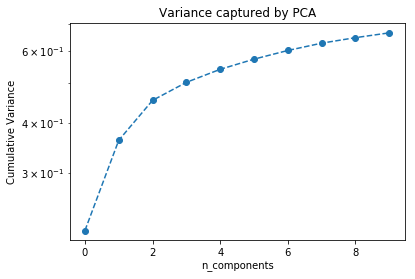

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
trans_features = pca.fit_transform(scaled_features)

print('Total variance captured: {:.2f}%'.format(pca.explained_variance_ratio_.cumsum()[-1]*100))
plt.semilogy(pca.explained_variance_ratio_.cumsum(), '--o')
plt.title('Variance captured by PCA')
plt.xlabel('n_components')
plt.ylabel('Cumulative Variance')
#core3_headPress_trans = pca_core3_headPress.fit_transform(core3_headPress_scaled)
#plt.semilogy(pca_core3_headPress.explained_variance_ratio_.cumsum(), '--o')




trans_features_df = pd.DataFrame(data=trans_features, 
                                       columns=['PCA {}'.format(i+1) for i in range(trans_features.shape[1])])


In [18]:
trans_features_df

,PCA 1,PCA 2,PCA 3
0,10.340956,-17.558701,35.608824
1,11.716846,-17.599518,30.691702
2,12.829349,-17.892646,30.073359
3,8.791946,2.792823,8.212000
4,10.994496,2.616954,3.555283
5,8.168972,3.636570,4.685151
6,8.429725,3.414224,4.324181
7,11.087069,2.598867,2.690077
8,8.682909,2.966848,3.779178
9,7.538941,3.969820,3.660057


<IPython.core.display.Javascript object>


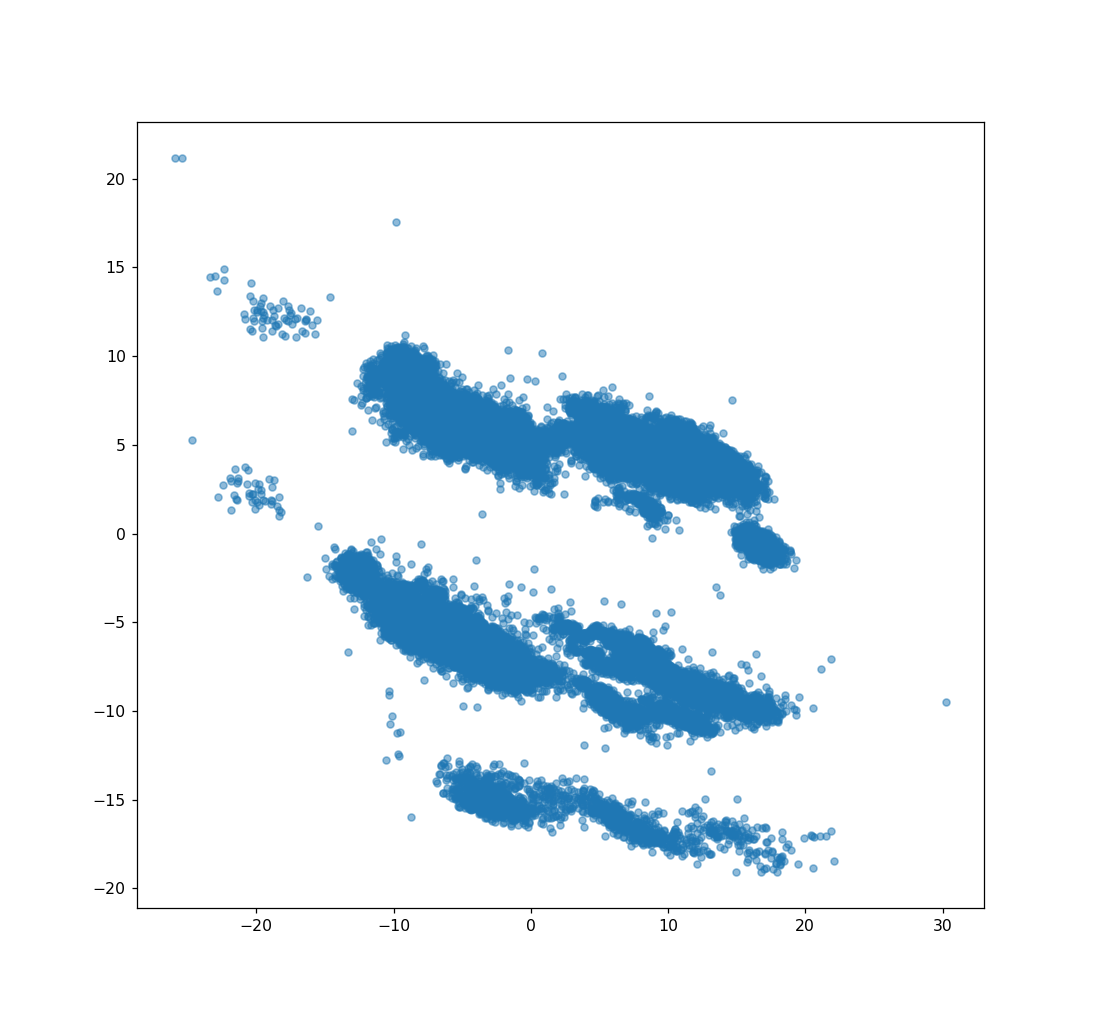

In [16]:
#fig, ax = plt.subplots(1,1, figsize=(12,8), projection='3d')
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter(transformed_features[:,0], transformed_features[:,1], transformed_features[:, 2])
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.scatter(transformed_features[:,0], transformed_features[:, 1],  alpha=0.5, s=20)

(107569,)
(107569, 3)


<IPython.core.display.Javascript object>


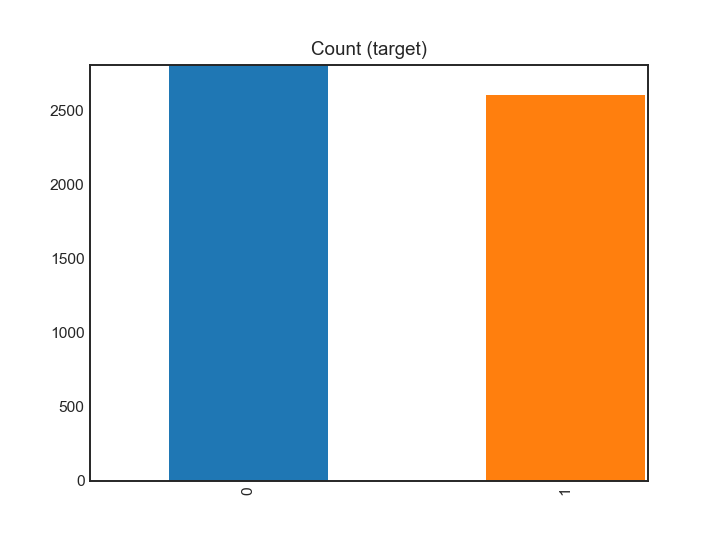

In [158]:
target = labels_df.defect.values
print(target.shape)
print(trans_features.shape)
plt.figure(4)
total_features_df.defect.value_counts().plot(kind='bar', title='Count (target)');

In [142]:
X_train, X_test, y_train, y_test = train_test_split(trans_features, target, test_size=0.4)
#model = svm.SVR(kernel='rbf', gamma='auto')
#model.fit(X_train, y_train)
#y_prdct = model.predict(X_test)
#mean_squared_error(y_test,y_prdct)

<IPython.core.display.Javascript object>


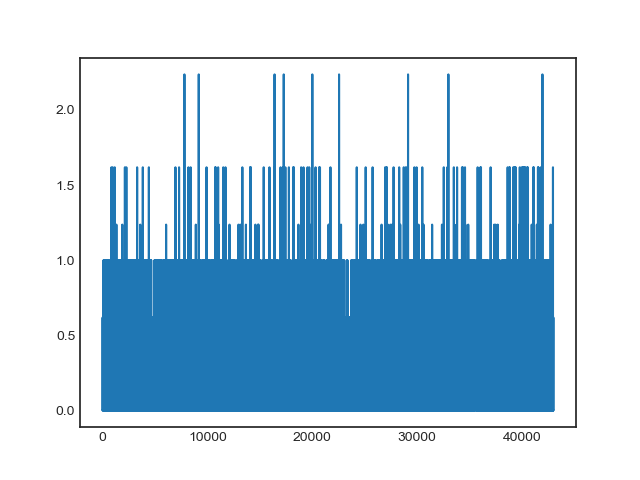

In [126]:
plt.figure(5)
plt.plot(y_test)

<IPython.core.display.Javascript object>


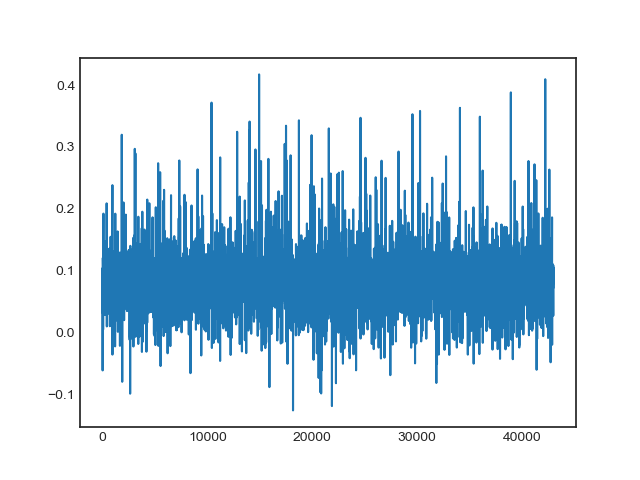

In [137]:
plt.figure(8)
plt.plot(y_prdct)

In [148]:
gammas = np.asarray([0.1, 0.2, 0.3, 0.4, 0.5])
mses = [0 for x in range(len(gammas))]
for i in range(5):
    model = svm.SVR(kernel='rbf', gamma=gammas[i])
    model.fit(X_train, y_train)
    y_prdct = model.predict(X_test)
    mses[i]=mean_squared_error(y_test,y_prdct)
    


In [151]:
gammas2 = np.asarray([0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 2])
mses2 = [0 for x in range(len(gammas2))]
for i in range((len(gammas2))):
    model = svm.SVR(kernel='rbf', gamma=gammas2[i])
    model.fit(X_train, y_train)
    y_prdct = model.predict(X_test)
    mses2[i]=mean_squared_error(y_test,y_prdct)

<IPython.core.display.Javascript object>


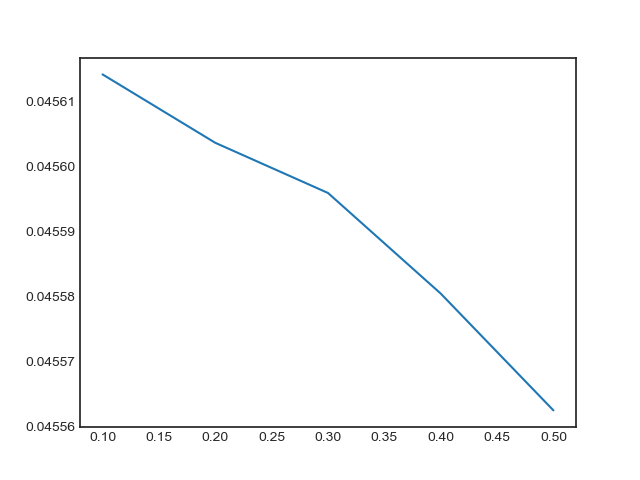

In [149]:
plt.figure(10)
plt.plot(gammas, mses )

In [170]:
scaler = StandardScaler()
X = scaler.fit_transform(features_df)
y = labels_df.values

C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [173]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=2)
clf.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[[ 10.34095636 -17.55870115  35.60882208]
 [ 11.7168459  -17.59951822  30.69170124]
 [ 12.82934863 -17.89264653  30.07335848]
 ...
 [  0.44332486   3.81846294  -0.85199723]
 [  0.14440765   3.77211966  -0.98430817]
 [ -0.2089296    4.24344025  -0.23452523]]


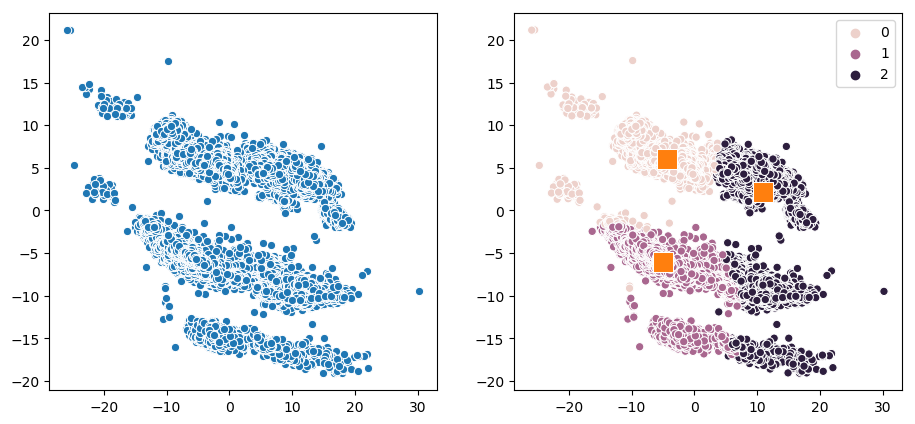

[-4.40172242 -4.90800028 10.88475349] [ 5.98121933 -6.01154085  2.12644515]


In [16]:
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

# fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(trans_features)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

print((trans_features))
#print(fcm_labels,fcm_centers)
# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(trans_features[:,0], trans_features[:,1], ax=axes[0])
scatter(trans_features[:,0], trans_features[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
#scatter(fcm_centers[:,0], fcm_centers[:,2], ax=axes[1],marker="s",s=200)
#scatter(fcm_centers[:,1], fcm_centers[:,2], ax=axes[1],marker="s",s=200)
plt.show()
print(fcm_centers[:,0], fcm_centers[:,1])

In [20]:
predict_me = np.array(trans_features[1].astype(float))
predict_me = predict_me.reshape(-1, len(predict_me))
fcm.predict(predict_me)

array([2], dtype=int64)

In [ ]:
trans_features[1]

if prediction[0] == y[1]:
        correct += 1

In [174]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6598927200215675


In [23]:
from sklearn.cluster import MeanShift, KMeans

msc = MeanShift()
msc.fit(trans_features)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [32]:
labels = msc.labels_
cluster_centers = msc.cluster_centers_

In [30]:
trans_features_df['cluster_group']=np.nan

In [34]:
for i in range(len(trans_features_df)):
    trans_features_df['cluster_group'].iloc[i] = labels[i]

In [40]:
trans_features_df['defect'] = labels_df.values

In [43]:
n_clusters_ = len(np.unique(labels))
defect_rates = {}
for i in range(n_clusters_):
    temp_df = trans_features_df[ (trans_features_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    defect_cluster = temp_df[  (temp_df['defect'] == 1) ]

    defect_rate = len(defect_cluster) / len(temp_df)
    #print(i,survival_rate)
    defect_rates[i] = defect_rate
    
print(defect_rates)

{0: 0.019742686036849193, 1: 0.03342030755565425, 2: 0.010752688172043012, 3: 0.01818181818181818, 4: 0.008547008547008548, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0}


In [49]:
#dataset_df['cluster_group'] = trans_features_df['cluster_group']

dataset_df[ (dataset_df['cluster_group']==1) ].describe()

,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,fDie2wflow_en2,...,tiebar_mae,Die,Shift,Shot_no,dayOfWeek,cav1_defect,cav2_defect,defect,defect_smoothed,cluster_group
count,103223.000000,103223.000000,103223.000000,103223.000000,103223.000000,103223.000000,103223.000000,103223.000000,103223.000000,103223.000000,...,103223.000000,103223.000000,103223.000000,103223.000000,103223.000000,103223.000000,103223.000000,103223.000000,103223.000000,103223.0
mean,19.931245,9.329289,-0.534113,4.757474,1.822914,0.009926,0.014775,3.565899,-0.674715,1.764085,...,0.047418,1.858297,1.501816,309.991765,2.119469,0.012555,0.012207,0.024403,0.053940,1.0
std,6.336037,4.373668,2.510315,11.600271,2.540394,0.222158,0.085050,3.220839,4.145015,2.020925,...,0.011566,1.094994,0.499999,190.590066,1.402529,0.111346,0.109808,0.154299,0.209964,0.0
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000026,0.003317,-1.000000,-1.000000,-1.000000,...,0.014232,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,18.149512,3.277275,-0.977784,-0.995263,-0.986083,0.000205,0.007979,2.474378,-0.979506,-0.997534,...,0.040793,1.000000,1.000000,150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,19.023018,11.247113,-0.619642,-0.843729,2.141024,0.000389,0.009939,3.646430,-0.969943,2.321829,...,0.045333,1.000000,2.000000,297.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,23.039138,12.521946,-0.438530,17.701057,3.764076,0.000716,0.012365,4.534848,-0.738688,3.426161,...,0.054111,3.000000,2.000000,455.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,738.816830,128.011120,337.405940,886.671260,184.527010,8.664119,3.932234,451.660340,837.109900,73.172940,...,1.474440,4.000000,2.000000,878.000000,5.000000,1.000000,1.000000,1.000000,2.236844,1.0


In [48]:
dataset_df

,File_No,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,...,Die,Cast_date,Shift,Shot_no,dayOfWeek,cav1_defect,cav2_defect,defect,defect_smoothed,cluster_group
0,B1012-278-1AF10005,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,...,1,2018-01-15,1,5,0,0,0,0,0.000000,3.0
1,B1012-278-1AF10006,22.802261,1.165540,-0.969839,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,...,1,2018-01-15,1,6,0,0,0,0,0.000000,3.0
2,B1012-278-1AF10007,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,...,1,2018-01-15,1,7,0,0,0,0,0.000000,3.0
3,B1012-278-1AF10008,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,...,1,2018-01-15,1,8,0,0,0,0,0.000000,1.0
4,B1012-278-1AF10009,24.256344,2.081036,-0.970541,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,...,1,2018-01-15,1,9,0,0,0,0,0.000000,1.0
5,B1012-278-1AF10010,24.451166,2.219615,-0.977122,16.582668,-0.917516,0.001678,0.025937,9.019852,0.135056,...,1,2018-01-15,1,10,0,0,0,0,0.000000,1.0
6,B1012-278-1AF10011,25.327190,2.288937,-0.979330,17.375237,-0.934044,0.001821,0.029028,8.904948,-0.033287,...,1,2018-01-15,1,11,0,0,0,0,0.000000,1.0
7,B1012-278-1AF10012,26.121300,2.630819,-0.970186,17.716516,-0.909404,0.002732,0.034934,8.365232,-0.184044,...,1,2018-01-15,1,12,0,0,0,0,0.000000,1.0
8,B1012-278-1AF10013,24.465048,2.394772,-0.977317,17.329178,-0.947928,0.001401,0.024786,8.130345,-0.143087,...,1,2018-01-15,1,13,0,0,0,0,0.000000,1.0
9,B1012-278-1AF10014,25.383656,2.601822,-0.974734,17.313204,-0.932106,0.001824,0.030129,8.468645,-0.182594,...,1,2018-01-15,1,14,0,0,0,0,0.000000,1.0


In [51]:
scaled_features_df = pd.DataFrame(data=scaled_features, 
                                       columns=['PCA {}'.format(i+1) for i in range(trans_features.shape[1])])

scaled_features.shape

(107569, 282)

In [57]:
dataset_df.columns.values.shape

(288,)

In [4]:
st =  "abcdefghij"
st[:-3]

'abcdefg'

In [5]:
arr = ['fDie1wflow_mae', 'fDie2wflow_mae', 'mDie1wflow_mae',
       'mDie2wflow_mae', 'mDie3wflow_mae', 'sleevewflow_mae',
       'tipwflow_mae', 'core3_mae', 'core4_mae', 'core5_mae', 'core6_mae',
       'ep_mae', 'injection_mae', 'lub_mae', 'tiebar_mae']

In [6]:
for i in range(len(arr)):
    arr[i] = arr[i][:-4]
    
print(arr)

['fDie1wflow', 'fDie2wflow', 'mDie1wflow', 'mDie2wflow', 'mDie3wflow', 'sleevewflow', 'tipwflow', 'core3', 'core4', 'core5', 'core6', 'ep', 'injection', 'lub', 'tiebar']


In [9]:
import numpy as np
np.concatenate((arr, ['melt_Al_wflow_temp', 'melt_Al_hight', 'Die_lub_conc', 'shot_Vel1',
       'shot_Vel2', 'shot_Vel3', 'shot_Vel4', 'shot_Pos1', 'shot_Pos2',
       'shot_MetalPress.', 'shot_Inten.Time', 'shot_Biscuit']), axis=None).shape

(27,)